# Cell Types Project
### Exploring L4 & L5 Neuronal Dynamics in Epilepsy of Mouse vs. Human Specimens

## Team Member Names & Contributions

- **Ber Al Jaibaji A16810381**: Data Wrangling, Statistics, Visualization
- **Elizaveta Beltyukova**: Background Research, Editing, Discussion, Code Explanation Comments
- **Doris Tian A18601529**: Background Research, Data Wrangling, Data Analysis, Referencing, Markdown

## Abstract

## Research Question
How do Layer 4 (L4) and Layer 5 (L5) neurons differ in their electrophysiological properties and gene expression profiles in epileptic human groups? What are the gene expression in human temporal lobe?

### Background and Prior Work

Epilepsy is a prevalent neurological disorder characterized by recurrent seizures, affecting millions worldwide. Despite its commonality, the underlying mechanisms remain complex and not fully understood. The traditional view attributes epilepsy to an imbalance between excitatory and inhibitory neuronal activity. Temporal lobe epilepsy (TLE) is the most common form of focal epilepsy, characterized by recurrent seizures originating in the temporal lobe of the brain. (Englot, et. al. 2020).

Recent studies have revealed intriguing differences in neuronal activity between epileptic and non-epileptic individuals, particularly in cortical layers 4 and 5. These findings suggest that both L4 and L5 neurons play crucial roles in epileptic hyperexcitation, albeit through different mechanisms. A 2023 study found significantly higher firing rates in the granular layer (L4) neurons of epileptic individuals compared to non-epileptic controls (Bod et. al. 2023). Complementary research on Layer 5 (L5) neurons showed upregulation of genes encoding glutamate receptor subunits, AMPA receptor components, and voltage-gated ion channels (Pfisterer et al 2020).

By comparing neuron layers 4 and 5 electrophysiologically and morphologically, we aim to to investigate the difference in electrophysiology and morphology of L4 and L5 neurons in epileptic individuals. We also aim to provide information on the transcriptomics of temporal lobe as a guideline for studying temporal lobe epilepsy.

The first data modality we incorporate to address the question is the Allen Brain Atlas Cell Features dataset, which contains both electrophysiological recordings and morphology of neurons. There are a total of 2333 observations and 54 columns, including human with epilepsy or tumour and transgenic mouse line data. We filtered the dataset to only include the human (Homo Sapiens) with diagnosed epilepsy with a focus on middle temporal gyrus (MTG), which left us with 299 observations.The second data modality is the Human Brain Microarray data from Allen Brain Atlas. This dataset includes data that reflects gene expression in 6 human subjects. Although almost all brain areas are covered, we primarily focused on the data obtained from temporal lobe. However, this data does not include any information about the disease state of the human subjects, therefore it is used to overview the gene expression in temporal lobe.


### References (include links):

(1)Englot DJ, Morgan VL, Chang C. Impaired vigilance networks in temporal lobe epilepsy: Mechanisms and clinical implications. Epilepsia. 2020 Feb;61(2):189-202. doi: 10.1111/epi.16423. Epub 2020 Jan 4. PMID: 31901182; PMCID: PMC7033006. https://pubmed.ncbi.nlm.nih.gov/31901182/

(2)Bod R, Tóth K, Essam N, Tóth EZ, Erõss L, Entz L, Bagó AG, Fabó D, Ulbert I, Wittner L. Synaptic alterations and neuronal firing in human epileptic neocortical excitatory networks. Front Synaptic Neurosci. 2023 Aug 10;15:1233569. doi: 10.3389/fnsyn.2023.1233569. PMID: 37635750; PMCID: PMC10450510.https://pmc.ncbi.nlm.nih.gov/articles/PMC10450510/#:~:text=Granular%20layer%20(L4)%20neurons%20showed,during%20blockade%20of%20glutamate%20receptors

(3)Pfisterer, U., Petukhov, V., Demharter, S. et al. Identification of epilepsy-associated neuronal subtypes and gene expression underlying epileptogenesis. Nat Commun 11, 5038 (2020). https://doi.org/10.1038/s41467-020-18752-7.https://www.nature.com/articles/s41467-020-18752-7

(4)Cell types feature data: https://celltypes.brain-map.org/data

(5)Microarray data: https://human.brain-map.org/microarray/search/show?search_term=94&search_type=gene_classification

### Hypothesis

It is hypothesized that L4 neurons show differences in morphology and electrophysiological properties suffering from epilepsy.

### Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm
from scipy.stats import ttest_ind

## Cell Types : Analaysis of L4 an L5 neurons in Epilepsy subjects Temporal Lobe

We further explore the activity and roles of L4 and L5 neurons in epilepsy by conducting a comprehensive comparison of their electrophysiological properties and morphological characteristics, with a particular focus on the temporal lobe. The specific electrophysiological properties we looked at are the average isi (interval between spikes), the average firing rate, and the fi curve slope (measure of current sensitivity). For morphological properties, we investigated the number of dendritic stems and the number of axon bifurcations. By doing this analysis, we hope to provide new insights into the complex neural mechanisms underlying epilepsy. 

### Data Wrangling 1

In [28]:
cell_features_df = pd.read_csv('cell_types_specimen_details.csv')

print(f"Dataset Shape: {cell_features_df.shape}")
print("Available Columns:", cell_features_df.columns)


Dataset Shape: (2333, 54)
Available Columns: Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendr

In [29]:
#Cleaning data into human - MTG - epilepsy - L4/L5 layers
humancell_df = cell_features_df[cell_features_df['donor__species']=='Homo Sapiens']
human_MTG_data = humancell_df[humancell_df['structure__acronym']=='MTG']
epihumancell_df = human_MTG_data[human_MTG_data['donor__disease_state']== 'epilepsy']
epihumanL4_df = epihumancell_df[epihumancell_df['structure__layer']=='4']
epihumanL5_df = epihumancell_df[epihumancell_df['structure__layer']=='5']



#
ephys_columns = [ 'ef__fast_trough_v_long_square','ef__upstroke_downstroke_ratio_long_square', 
                 'ef__adaptation', 'ef__f_i_curve_slope','ef__threshold_i_long_square', 'ef__tau',
                 'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp', 'ef__vrest']

morph_columns = ['nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio']

# Only keep the electrophysiology columns that are in the cell features data
ephys_columns_filtered = [col for col in ephys_columns if col in cell_features_df.columns]

morph_columns_filtered = [col for col in morph_columns if col in cell_features_df.columns]


# Drop all null values within our columns of interest
human_L4_ephys = epihumanL4_df[ephys_columns_filtered].dropna()
human_L5_ephys = epihumanL5_df[ephys_columns_filtered].dropna()
human_L4_morph = epihumanL4_df[morph_columns_filtered].dropna()
human_L5_morph = epihumanL5_df[morph_columns_filtered].dropna()


### L4/L5 Morphology Data Visualization and Analysis

Firstly, we run a series of statistics to calculate the mean,standard deviation and to discover any major differences between the two layers.

In [8]:
# Function to calculate statistics of cell features (mean, std, etc.) and save them to an array 
def compute_stats(data):
    if data.empty:
        return np.full((8, len(morph_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])

# Apply the function on our specified columns
human_L4_stats_morph = compute_stats(human_L4_morph)
human_L5_stats_morph = compute_stats(human_L5_morph)

# Assign label names
stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Create dataframes of L4 and L5 for each species, with indexes being the statistical labels,
# and columns being those that we filtered out earlier 
human_L4_stats_morph_df = pd.DataFrame(human_L4_stats_morph, index=stats_labels, columns=morph_columns_filtered)
human_L5_stats_morph_df = pd.DataFrame(human_L5_stats_morph, index=stats_labels, columns=morph_columns_filtered)

# Show all 4 of our dataframes
print("\nHuman Layer 4 (L4) Morphology Statistics:")
display(human_L4_stats_morph_df)

print("\nHuman Layer 5 (L5) Morphology Statistics:")
display(human_L5_stats_morph_df)


Human Layer 4 (L4) Morphology Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio
Count,14.000000,14.000000,14.000000,14.000000,14.000000
Mean,668.831145,5.142857,25.285714,0.871178,0.955755
Std,264.030427,1.301491,14.771733,0.031464,0.035634
Min,288.950400,4.000000,11.000000,0.824509,0.905363
25%,394.040285,4.000000,17.250000,0.839902,0.923070
50%,686.862964,5.000000,21.000000,0.883809,0.950142
75%,886.874302,5.750000,24.750000,0.894565,0.998932
Max,1115.214770,9.000000,62.000000,0.928443,1.000000



Human Layer 5 (L5) Morphology Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio
Count,21.000000,21.000000,21.000000,21.000000,21.000000
Mean,775.523692,5.333333,26.761905,0.862977,0.963632
Std,398.616971,0.992032,10.809629,0.040944,0.036255
Min,266.485184,3.000000,10.000000,0.764709,0.889893
25%,405.552346,5.000000,20.000000,0.845901,0.930433
50%,628.687486,5.000000,26.000000,0.867519,0.979105
75%,1054.738463,6.000000,31.000000,0.891355,0.994290
Max,1623.575309,7.000000,55.000000,0.925520,1.000000


However, there is no oblivious difference between the datasets. Then we decide to visualize the data.

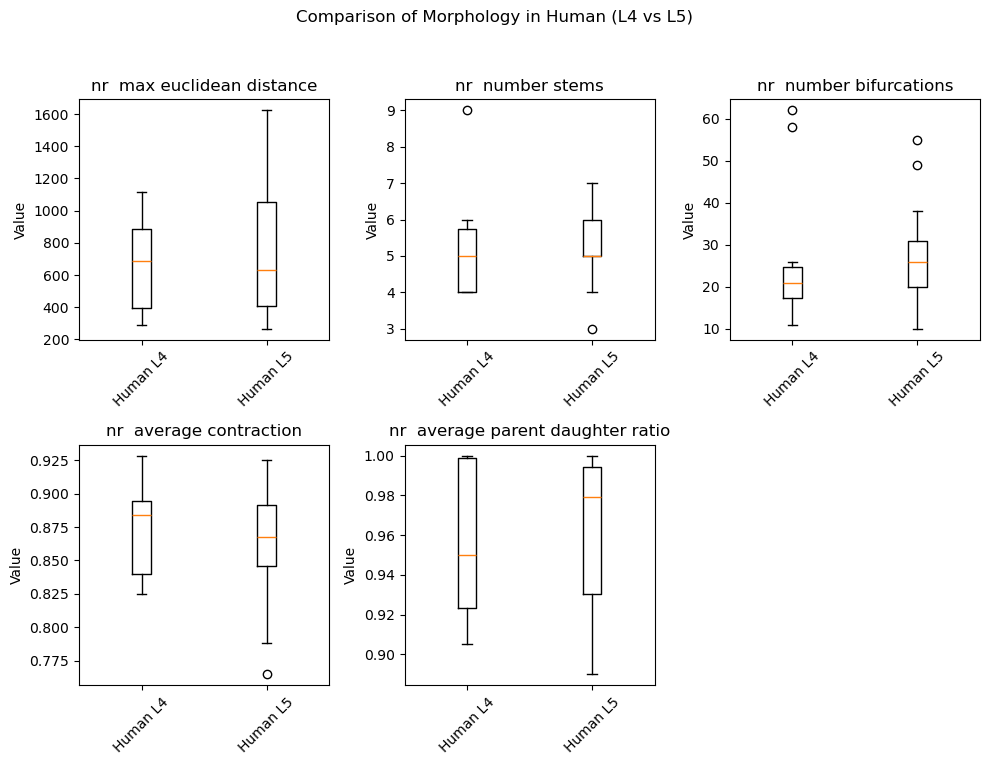

In [33]:
# Create a box plot comparing Morphology of L4 and L5 between mouse and human
plt.figure(figsize=(10, 8))

# Make a for loop that runs through the first 6 features (columns), drops null values
#  and makes a boxplot
for i, col in enumerate(morph_columns_filtered):  
    plt.subplot((len(morph_columns_filtered) - 1) // 3 + 1, 3, i + 1)
    plt.boxplot([
        human_L4_morph[col].dropna(), 
        human_L5_morph[col].dropna()
    ], labels=['Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')
    plt.xticks(rotation=45)

plt.suptitle("Comparison of Morphology in Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

However, by looking at the graphs, there is no subjective observation that can be made upon the difference between two layers. We further did statitical t-tests for each properties to identify any statistical significance (p-value < 0.05)

In [34]:
morph_ttest_df=pd.DataFrame(columns= ['nr_Properties', 'p_value'])
for column in morph_columns:
    t_stat, p_value = ttest_ind(human_L4_morph[column], human_L5_morph[column], equal_var=False)
    morph_ttest_df = pd.concat([morph_ttest_df, pd.DataFrame({'nr_Properties': [column], 'p_value': [p_value]})], ignore_index=True)

morph_ttest_df

,nr_Properties,p_value
0,nr__max_euclidean_distance,0.361740
1,nr__number_stems,0.657302
2,nr__number_bifurcations,0.759243
3,nr__average_contraction,0.521342
4,nr__average_parent_daughter_ratio,0.542710


The resulting p-values shows there is no difference in morphology properties between L4 and L5 layers.

### Electrophysiology Data Visualization and Analysis 

Thereby, we dicide to use the same approach to analyze the electrophysiology data and try to find the difference between L4 and L5 neurons.

In [35]:
# Function to calculate statistics of cell features (mean, std, etc.) and save them to an array 
def compute_stats(data):
    if data.empty:
        return np.full((8, len(ephys_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])

# Apply the function on our specified columns
human_L4_stats_ephys = compute_stats(human_L4_ephys)
human_L5_stats_ephys = compute_stats(human_L5_ephys)

# Assign label names
stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Create dataframes of L4 and L5 for each species, with indexes being the statistical labels,
# and columns being those that we filtered out earlier 
human_L4_stats_ephys_df = pd.DataFrame(human_L4_stats_ephys, index=stats_labels, columns=ephys_columns_filtered)
human_L5_stats_ephys_df = pd.DataFrame(human_L5_stats_ephys, index=stats_labels, columns=ephys_columns_filtered)

# Show all 4 of our dataframes
print("\nHuman Layer 4 (L4) Electrophysiology Statistics:")
display(human_L4_stats_ephys_df)

print("\nHuman Layer 5 (L5) Electrophysiology Statistics:")
display(human_L5_stats_ephys_df)


Human Layer 4 (L4) Electrophysiology Statistics:


,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
Mean,-53.818752,3.070433,0.086973,0.281847,66.857143,27.364412,79.459793,17.387156,213.391023,4.174697,-67.956920
Std,6.071977,0.934274,0.159871,0.163740,41.111099,12.858803,57.625602,9.561184,86.429174,1.730262,4.275713
Min,-70.593750,1.277342,-0.015521,0.041667,20.000000,7.669349,22.193182,3.074842,74.218825,1.916387,-79.264778
25%,-55.109377,2.467762,0.024586,0.185575,45.000000,18.802180,50.493684,11.657826,148.649663,2.999253,-70.700451
50%,-52.593754,3.173174,0.054784,0.243497,50.000000,27.178200,63.898667,15.649779,220.312461,3.513787,-69.003845
75%,-49.593752,3.793024,0.086874,0.325193,70.000000,33.567180,85.952091,19.804808,267.890811,5.165713,-64.269100
Max,-42.781254,4.777959,0.971281,0.974647,210.000000,75.021607,325.220000,45.058884,438.750058,8.060820,-59.348194



Human Layer 5 (L5) Electrophysiology Statistics:


,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
Mean,-53.063060,3.532136,0.150057,0.176677,81.785714,30.349544,133.823019,11.066624,178.891018,4.608484,-67.534462
Std,3.936359,0.923004,0.246023,0.100804,43.470316,9.878534,90.536861,6.698678,68.307930,2.006655,3.948609
Min,-65.031250,1.364448,-0.028861,0.046667,10.000000,7.919526,38.440000,2.236436,63.281059,1.449750,-74.642593
25%,-54.281251,3.052373,0.023032,0.097596,50.000000,26.424393,63.370000,6.008238,136.015691,3.179708,-70.526062
50%,-52.640629,3.515100,0.048272,0.156536,70.000000,29.297015,112.545429,8.890332,173.047103,4.293037,-67.653088
75%,-50.500000,4.180984,0.134333,0.243471,102.500000,35.056059,166.453000,15.780691,210.122824,5.243585,-64.821680
Max,-45.656254,5.808203,0.975859,0.483584,210.000000,68.592079,447.140000,26.014568,376.322120,9.750447,-59.171257


Moreover, this time we dicide to look at the p-values first due to a larger number of properties than morphology.

In [54]:
ephys_ttest_df=pd.DataFrame(columns= ['ef_Properties', 'p_value'])
for column in ephys_columns:
    t_stat, p_value = ttest_ind(human_L4_ephys[column], human_L5_ephys[column], equal_var=False)
    ephys_ttest_df = pd.concat([ephys_ttest_df, pd.DataFrame({'ef_Properties': [column], 'p_value': [p_value]})], ignore_index=True)

ephys_ttest_df.set_index('ef_Properties')

,p_value
ef_Properties,
ef__fast_trough_v_long_square,0.520778
ef__upstroke_downstroke_ratio_long_square,0.025869
ef__adaptation,0.146237
ef__f_i_curve_slope,0.001449
ef__threshold_i_long_square,0.107674
ef__tau,0.251295
ef__avg_isi,0.000829
ef__avg_firing_rate,0.001359
ef__ri,0.052662


After calculating the p-value, we found that the average ISI,average firing rate and average F-I curve slope, and upstroke:downstroke ratio are significantly different. Therefore we dicide to visualise those properties.


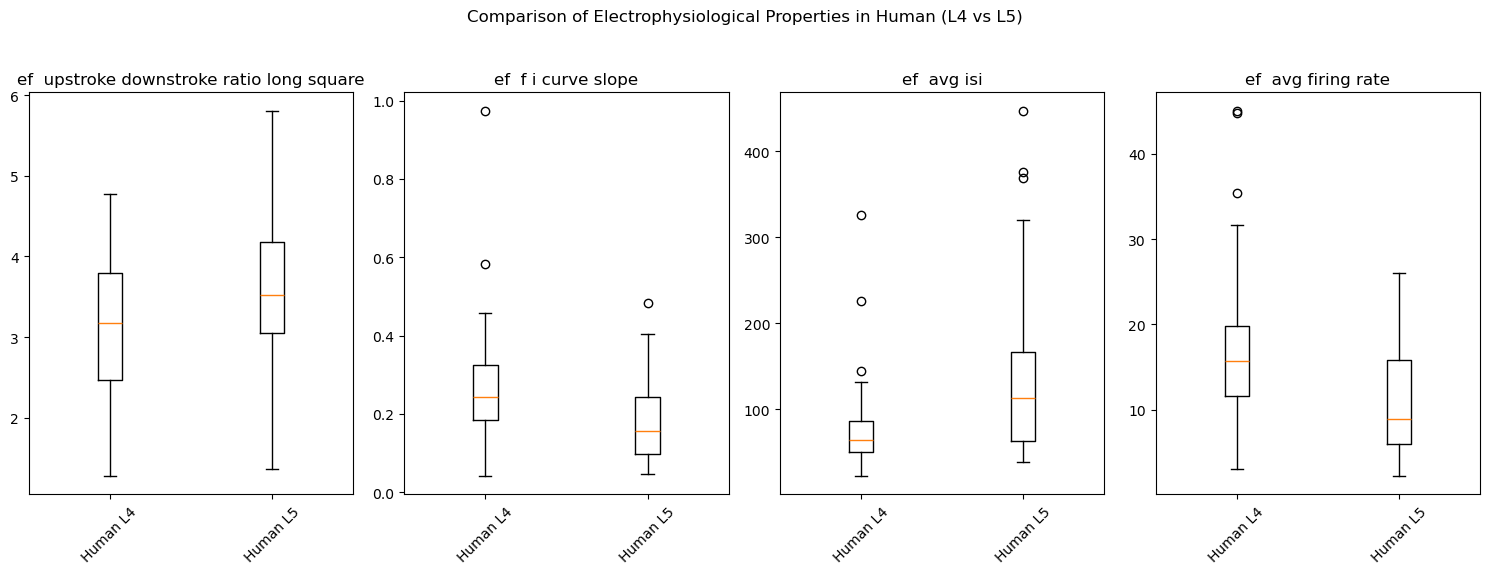

In [68]:
#Put all properties with significant difference into a list
significant_ephys_columns = ['ef__upstroke_downstroke_ratio_long_square','ef__f_i_curve_slope','ef__avg_isi','ef__avg_firing_rate']

# Create a box plot comparing L4 and L5 between mouse and human
plt.figure(figsize=(15, 6))

# Make a for loop that runs through the significantly different features (columns), drops null values
#  and makes a boxplot
for i, col in enumerate(significant_ephys_columns):  
    plt.subplot((len(significant_ephys_columns) - 1) // 4 + 1, 4, i + 1)
    plt.boxplot([
        human_L4_ephys[col].dropna(), 
        human_L5_ephys[col].dropna()
    ], labels=['Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.xticks(rotation=45)

plt.suptitle("Comparison of Electrophysiological Properties in Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The graphs demonstrates that the L4 neurons have a significantly higher F-I curve slope than L5 neurons, but a lower upstroke:downstroke ratio. L4 neurons also have a lower average interspike interval which corresponding to a higher average firing rate.

Furthermore, we generate a heatmap with temporal lobe gene expressions in humans using RNA sequencing data. The heatmap provides a powerful visual tool for understanding the complex transcriptional landscape of this brain region. It would offer a comprehensive visualization of gene expression patterns across different samples or conditions in the temporal lobe, allowing for easy identification of differentially expressed genes that may be associated with specific functions or pathologies, such as temporal lobe epilepsy. Moreover, in the context of single-cell RNA sequencing data, the heatmap could reveal gene expression patterns across different cell types within the temporal lobe, offering unprecedented insights into cell-specific transcriptional profiles. 

### Microarray data wrangling

## Discussion
According to the term explanation (reference 6), Average firing rate (spikes/s)	is the number of spikes during the entire stimulus interval.
Average ISI (ms) is Average interspike interval duration.
F-I curve slope (spikes/s/pA) is the slope of linear fit to the frequency response of the cell versus stimulus intensity curve.
Upstroke:Downstroke	Ratio is the ratio between the peak upstroke (rate of rise of the action potential) to peak downstroke (rate of fall of the action potential).

## Conclusion

## Supplementary

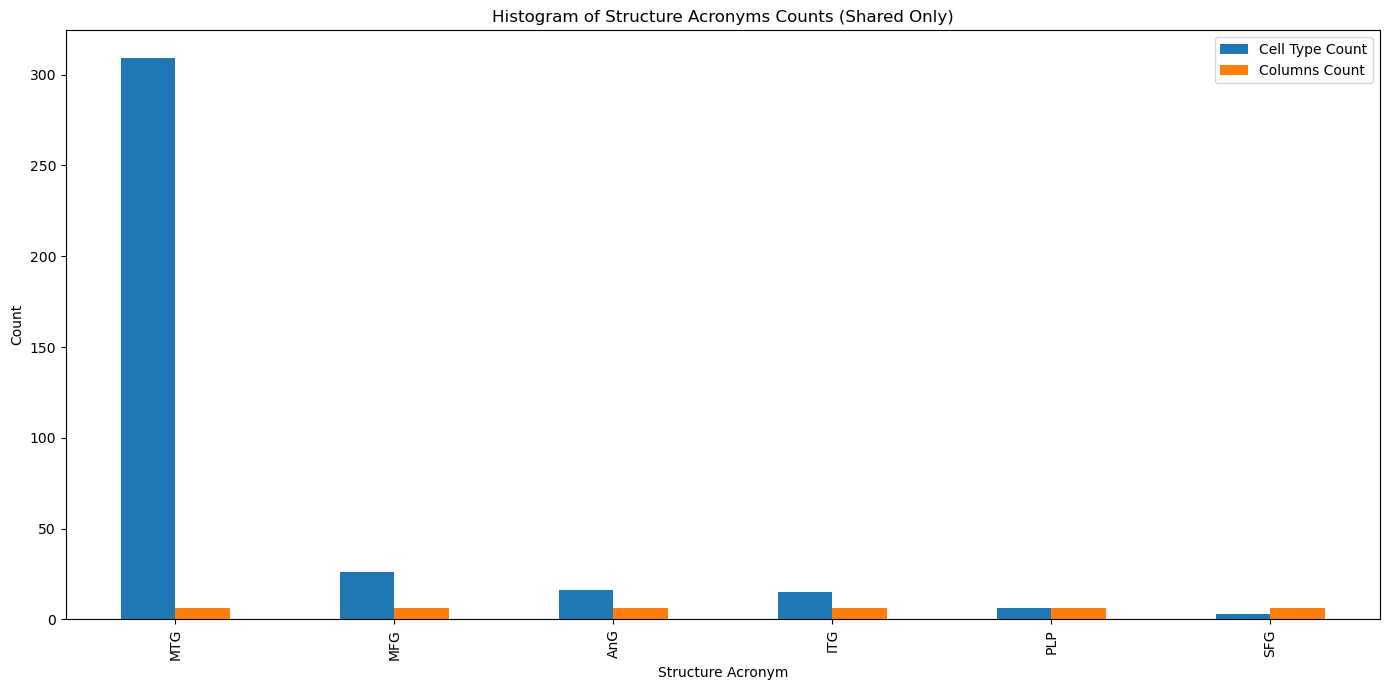

In [29]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Combine both counts into a dictionary
acronym_counts = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_counts[acronym] = {
            "Cell Type Count": cell_count,
            "Columns Count": column_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_counts, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Count", "Columns Count"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Count", "Columns Count"], ascending=False)

# Plot histograms
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Count", "Columns Count"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Count")
plt.title("Histogram of Structure Acronyms Counts (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Count", "Columns Count"])
plt.tight_layout()
plt.show()




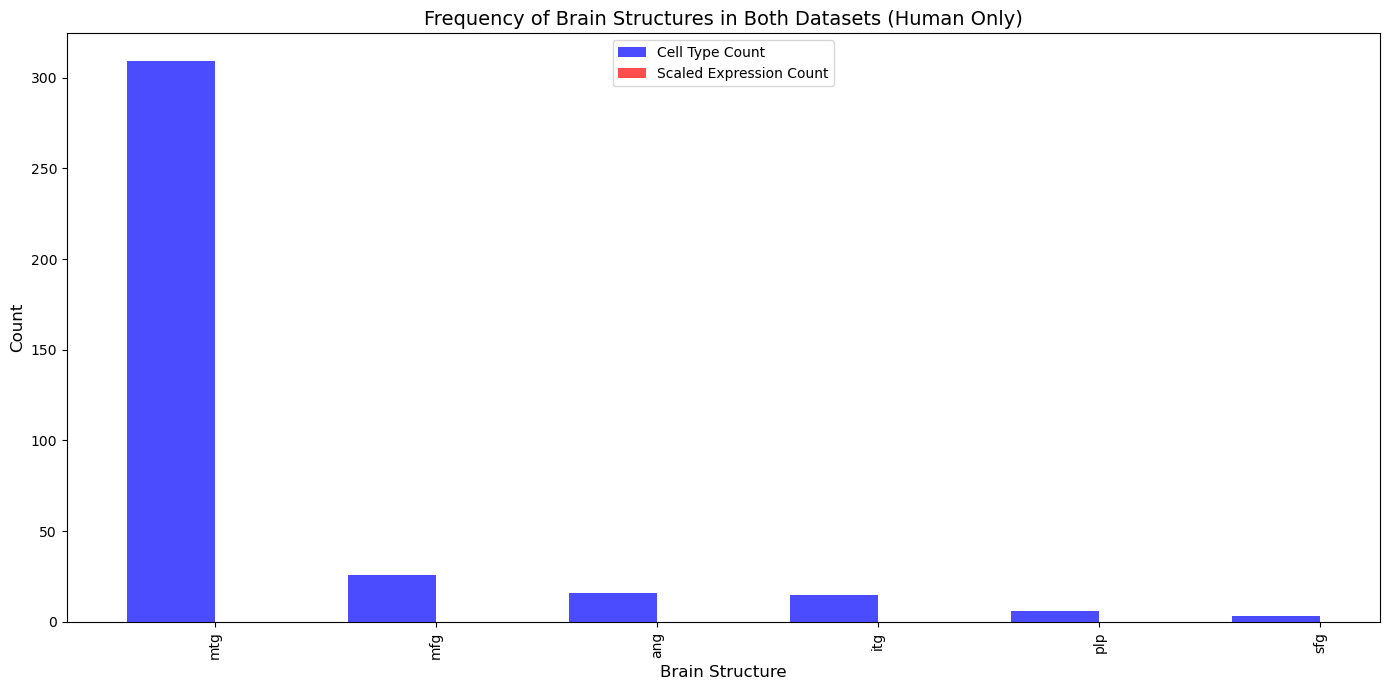

In [30]:

data = data[data["donor__species"] == "Homo Sapiens"]

# Use structure acronyms for better matching
data["structure_name"] = data["structure__acronym"].str.strip().str.lower()
columns_df["structure_name"] = columns_df["structure_abbreviation"].str.strip().str.lower()

# Count occurrences of each brain structure in both datasets
structure_counts_data = data["structure_name"].value_counts().reset_index()
structure_counts_data.columns = ["Brain Structure", "Cell Type Count"]

structure_counts_columns = columns_df["structure_name"].value_counts().reset_index()
structure_counts_columns.columns = ["Brain Structure", "Expression Count"]

# Merge counts into a single dataframe, keeping only matching structures
merged_counts = structure_counts_data.merge(structure_counts_columns, on="Brain Structure", how="inner")

# Sort by frequency for better visualization
merged_counts = merged_counts.sort_values(by=["Cell Type Count", "Expression Count"], ascending=False)

# Normalize expression counts using Min-Max normalization
min_expr = merged_counts["Expression Count"].min()
max_expr = merged_counts["Expression Count"].max()
merged_counts["Expression Count"] = (merged_counts["Expression Count"] - min_expr) / (max_expr - min_expr) * merged_counts["Cell Type Count"].max()

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(merged_counts))  # Label locations
width = 0.4  # Width of the bars

ax.bar(x - width/2, merged_counts["Cell Type Count"], width, color="blue", alpha=0.7, label="Cell Type Count")
ax.bar(x + width/2, merged_counts["Expression Count"], width, color="red", alpha=0.7, label="Scaled Expression Count")

ax.set_xticks(x)
ax.set_xticklabels(merged_counts["Brain Structure"], rotation=90)
plt.xlabel("Brain Structure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Frequency of Brain Structures in Both Datasets (Human Only)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Include cells that describe the steps in your data analysis.

,Structure Acronym,Cell Type Frequency,Columns Frequency
4,MTG,0.748184,0.005917
5,MFG,0.062954,0.005917
2,AnG,0.038741,0.005917
3,ITG,0.036320,0.005917
0,PLP,0.014528,0.005917
1,SFG,0.007264,0.005917


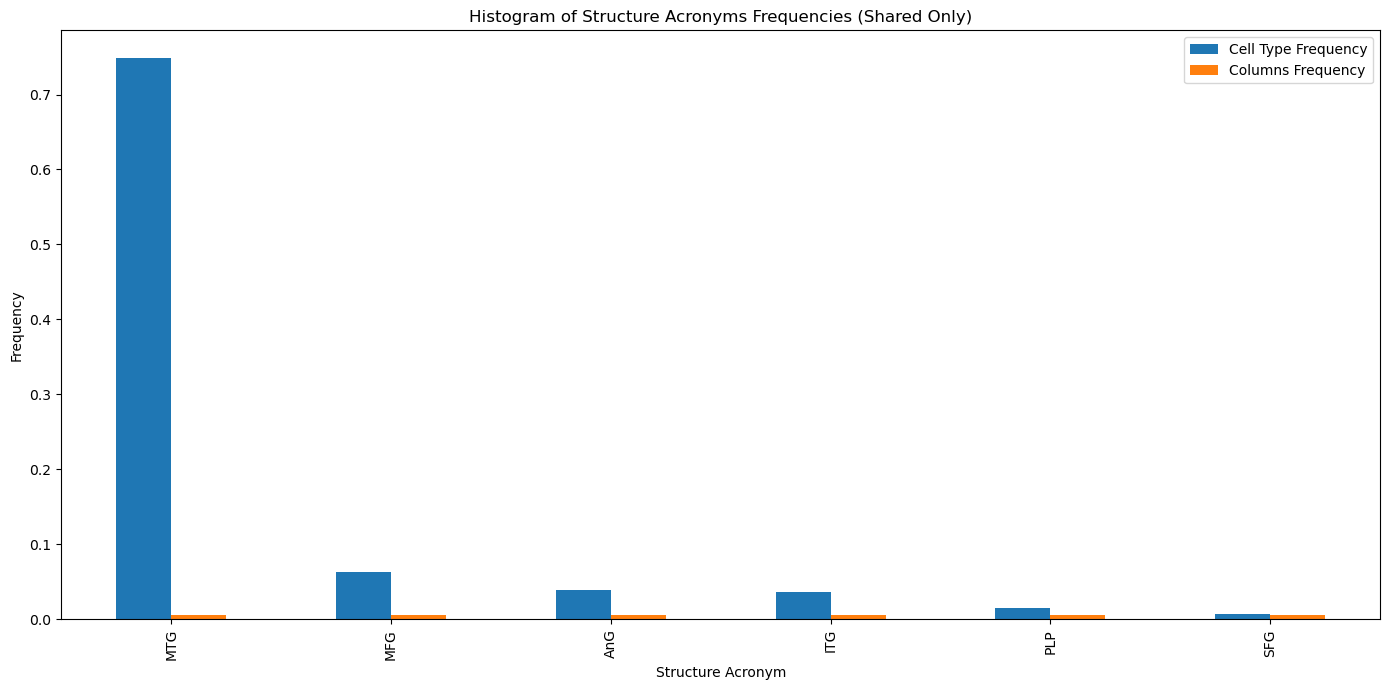

In [32]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Calculate total structure counts
total_cell_types = sum(cell_type_counts.values())
total_columns = sum(columns_counts.values())

# Combine both counts into a frequency dictionary
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency": cell_count / total_cell_types,
            "Columns Frequency": column_count / total_columns
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency", "Columns Frequency"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency", "Columns Frequency"], ascending=False)

# Display the frequencies as a table
from IPython.display import display

display(acronym_df)

# Plot frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency", "Columns Frequency"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Frequency")
plt.title("Histogram of Structure Acronyms Frequencies (Shared Only)")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency", "Columns Frequency"])
plt.tight_layout()
plt.show()


In [15]:
# Merge expression data with column metadata
columns_filtered = columns_df[['structure_id', 'structure_abbreviation']].drop_duplicates()
expression_melted = expression_df.melt(id_vars=expression_df.columns[0], var_name="Sample", value_name="Expression")
columns_df["Sample"] = columns_df.index.astype(str)
expression_merged = expression_melted.merge(columns_df, on="Sample")
expression_summary = expression_merged.groupby("structure_abbreviation")["Expression"].mean().reset_index()

# Display gene expression summary
display(expression_summary)

# Plot histogram of gene expression per structure
plt.figure(figsize=(14, 7))
sns.barplot(data=expression_summary, x="structure_abbreviation", y="Expression", color='blue')
plt.xlabel("Structure Acronym")
plt.ylabel("Mean Gene Expression")
plt.title("Histogram of Gene Expression Across Structures")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'columns_df' is not defined

In [33]:
# Count unique donor names in both datasets
donor_counts = {
    "Cell Types Donor Count": data["donor__name"].nunique(),
    "Columns Donor Count": columns_df["donor_name"].nunique()
}

# Display donor counts
display(pd.DataFrame([donor_counts]))


,Cell Types Donor Count,Columns Donor Count
0,42,6


,Structure Acronym,Cell Type Frequency (Normalized),Columns Frequency (Normalized)
4,MTG,7.357143,1.0
5,MFG,0.619048,1.0
2,AnG,0.380952,1.0
3,ITG,0.357143,1.0
0,PLP,0.142857,1.0
1,SFG,0.071429,1.0


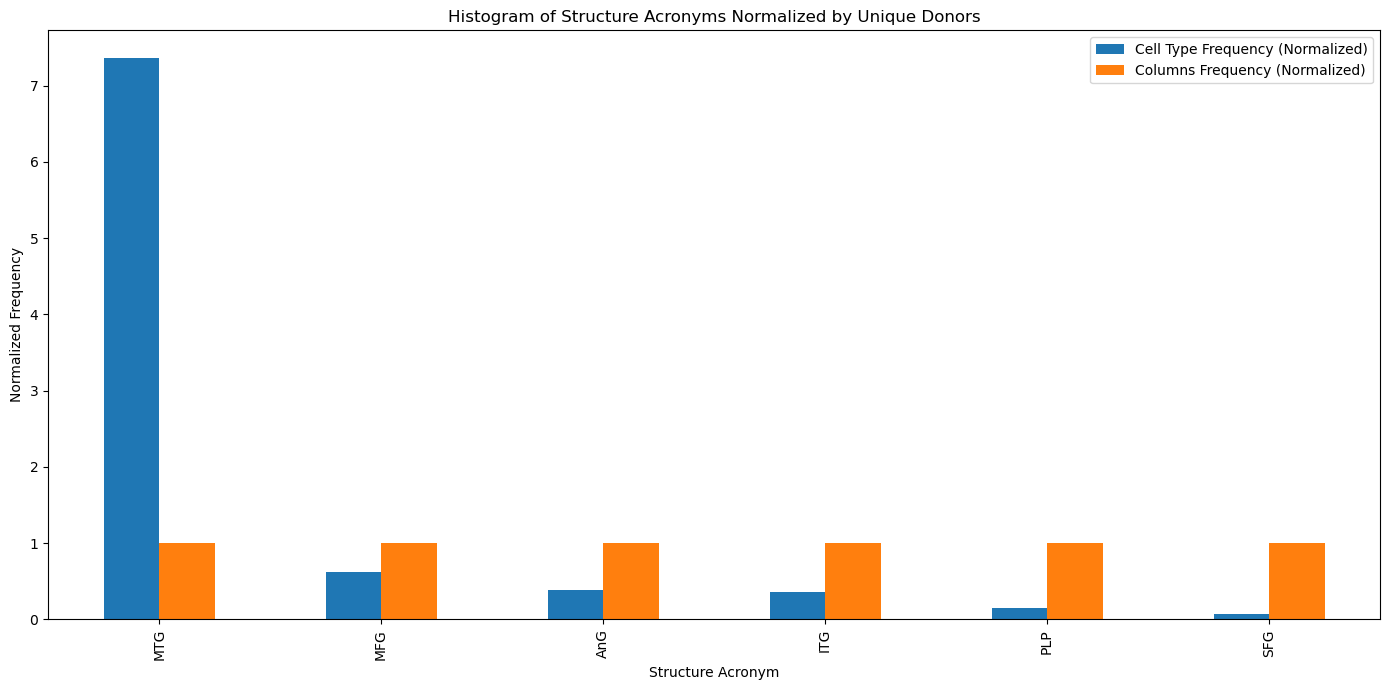

,Cell Types Donor Count,Columns Donor Count
0,42,6


In [34]:
# Extract and count structure acronyms
cell_type_counts = data["structure__acronym"].value_counts().to_dict()
columns_counts = columns_df["structure_abbreviation"].value_counts().to_dict()

# Count unique donor names in both datasets
cell_type_donor_count = data["donor__name"].nunique()
columns_donor_count = columns_df["donor_name"].nunique()

# Combine both counts into a frequency dictionary with normalization by donor count
acronym_frequencies = {}
for acronym in set(cell_type_counts.keys()).union(columns_counts.keys()):
    cell_count = cell_type_counts.get(acronym, 0)
    column_count = columns_counts.get(acronym, 0)
    if cell_count > 0 and column_count > 0:  # Keep only acronyms present in both datasets
        acronym_frequencies[acronym] = {
            "Cell Type Frequency (Normalized)": cell_count / cell_type_donor_count,
            "Columns Frequency (Normalized)": column_count / columns_donor_count
        }

# Convert dictionary to DataFrame for plotting
acronym_df = pd.DataFrame.from_dict(acronym_frequencies, orient='index').reset_index()
acronym_df.columns = ["Structure Acronym", "Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"]

# Sort data for better visualization
acronym_df = acronym_df.sort_values(by=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], ascending=False)

# Display the frequencies as a table
display(acronym_df)

# Plot normalized frequency histogram
fig, ax = plt.subplots(figsize=(14, 7))
acronym_df.plot(x="Structure Acronym", y=["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"], kind="bar", ax=ax)
plt.xlabel("Structure Acronym")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of Structure Acronyms Normalized by Unique Donors")
plt.xticks(rotation=90)
plt.legend(["Cell Type Frequency (Normalized)", "Columns Frequency (Normalized)"])
plt.tight_layout()
plt.show()

# Display donor counts
donor_counts = {
    "Cell Types Donor Count": cell_type_donor_count,
    "Columns Donor Count": columns_donor_count
}
display(pd.DataFrame([donor_counts]))


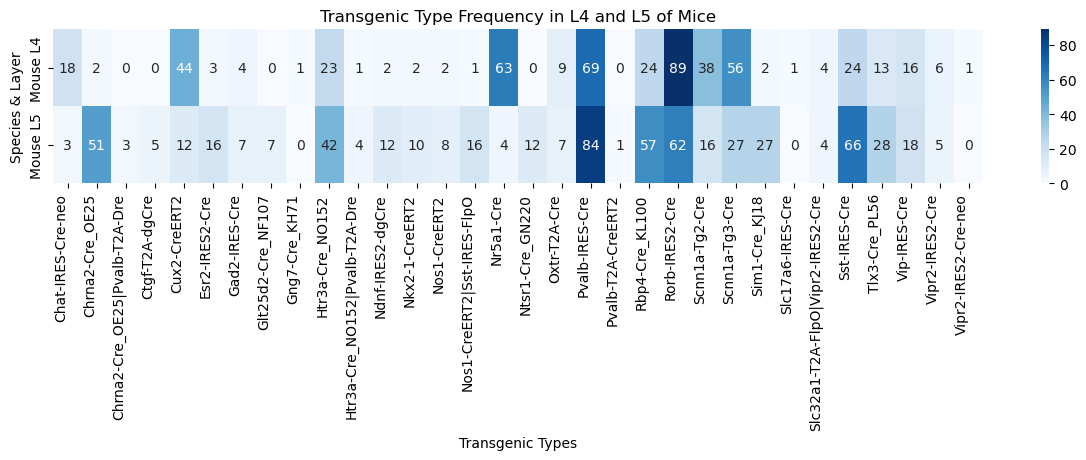

In [17]:
# Filter for Layer 4 (L4) and Layer 5 (L5)
l4_data = cell_features_df[cell_features_df['structure__layer'] == '4']
l5_data = cell_features_df[cell_features_df['structure__layer'] == '5']

# Separate human and mouse data
human_L4 = l4_data[l4_data['donor__species'] == 'Homo Sapiens']
human_L5 = l5_data[l5_data['donor__species'] == 'Homo Sapiens']
mouse_L4 = l4_data[l4_data['donor__species'] == 'Mus musculus']
mouse_L5 = l5_data[l5_data['donor__species'] == 'Mus musculus']

l4_l5_gene_counts = pd.concat([
    mouse_L4[['line_name']].assign(Species_Layer='Mouse L4'),
    mouse_L5[['line_name']].assign(Species_Layer='Mouse L5')
])


l4_l5_gene_counts = l4_l5_gene_counts.dropna()
gene_frequencies = l4_l5_gene_counts.groupby(['Species_Layer', 'line_name']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 2))
sns.heatmap(gene_frequencies, annot=True, cmap="Blues", fmt="d")

plt.title("Transgenic Type Frequency in L4 and L5 of Mice")
plt.xlabel("Transgenic Types")
plt.ylabel("Species & Layer")
plt.xticks(rotation=90, ha="right")

plt.show()
